In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data1 = pd.read_csv("Telco-Customer-Churn.csv")

In [85]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
data1.shape

(7043, 21)

In [87]:
data1.size

147903

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
data1.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 1. Compare Churn Count with respect to gender

Text(0, 0.5, 'count')

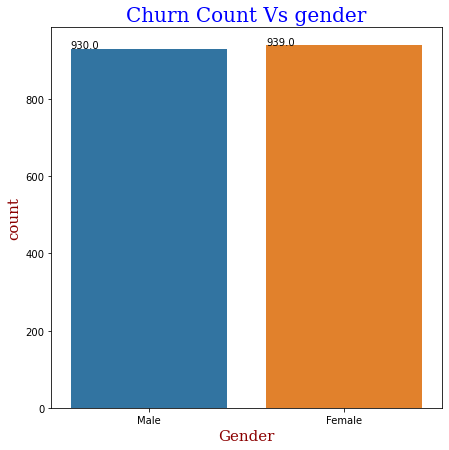

In [90]:
b1=data1[data1["Churn"]=="Yes"]

plt.figure(figsize=(7,7))

ax = sns.countplot(x='gender',data=b1)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
        
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Churn Count Vs gender", fontdict = font1)
plt.xlabel("Gender", fontdict = font2)
plt.ylabel("count", fontdict = font2)

# Insights

The Female churn count(939) is slifhtly greater than the male churn count(930).

# 2. Find out how many female senior citizens there in the dataset

In [91]:
data1['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [92]:
h1 = data1[(data1['gender']=='Female') & (data1['SeniorCitizen']==1) ]
rows = len(h1.axes[0])
print("Number of Female Senior Citizen is : ", rows)

Number of Female Senior Citizen is :  568


# 3. Compare Tenure with Total Charges

In [93]:
data1['TotalCharges']=pd.to_numeric(data1.TotalCharges,errors='coerce')

In [94]:
data1['TotalCharges'].dtypes

dtype('float64')

Text(0, 0.5, 'TotalCharges')

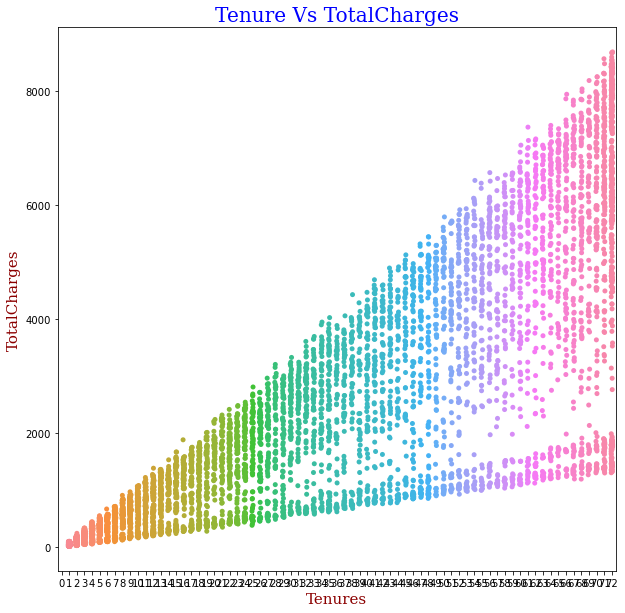

In [95]:
plt.figure(figsize=(10,10))
sns.stripplot(x="tenure", y="TotalCharges",data=data1)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Tenure Vs TotalCharges", fontdict = font1)
plt.xlabel("Tenures", fontdict = font2)
plt.ylabel("TotalCharges", fontdict = font2)

# Insights

As tenure increases the total charge also increases.

# 4. Find out which contract prefered by the senior citizen

In [96]:
h2 = data1[(data1['SeniorCitizen']==1)]

Text(0, 0.5, 'Count')

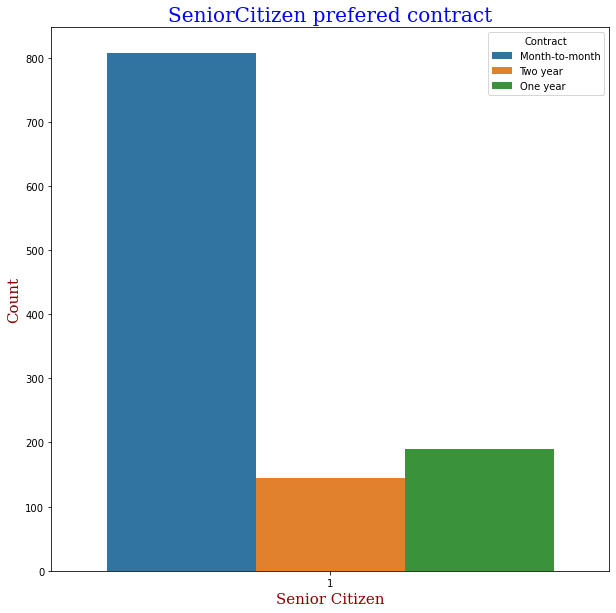

In [97]:
plt.figure(figsize=(10,10))

sns.countplot(x='SeniorCitizen',data=h2,hue="Contract")
plt.title('SeniorCitizen prefered contract',size=20)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("SeniorCitizen prefered contract", fontdict = font1)
plt.xlabel("Senior Citizen", fontdict = font2)
plt.ylabel("Count", fontdict = font2)

# Insights

Most senior citizen prefer month to month contract, Whereas least prefer Two year contract.

# 5. Comment your findings on Payment Method?

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

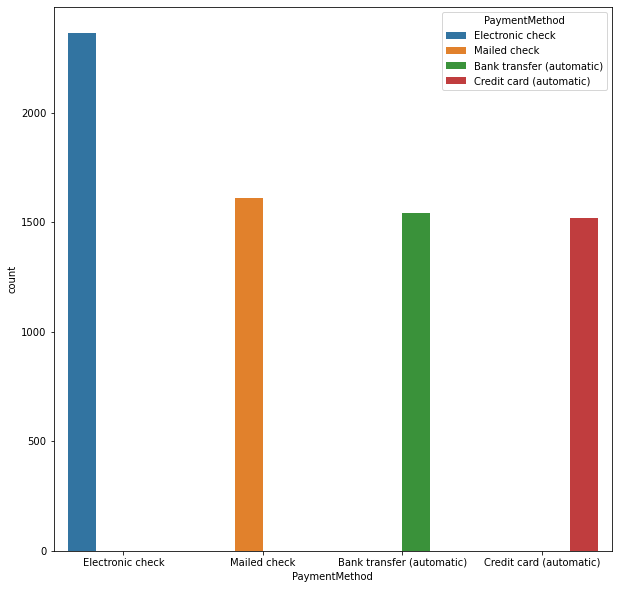

In [98]:
plt.figure(figsize=(10,10))
sns.countplot(x="PaymentMethod",data=data1,hue="PaymentMethod")


# Insights

Most of them prefer electronic check whereas least prefer Credit card payment.

Text(0.5, 1.0, 'Payment method based on Gender')

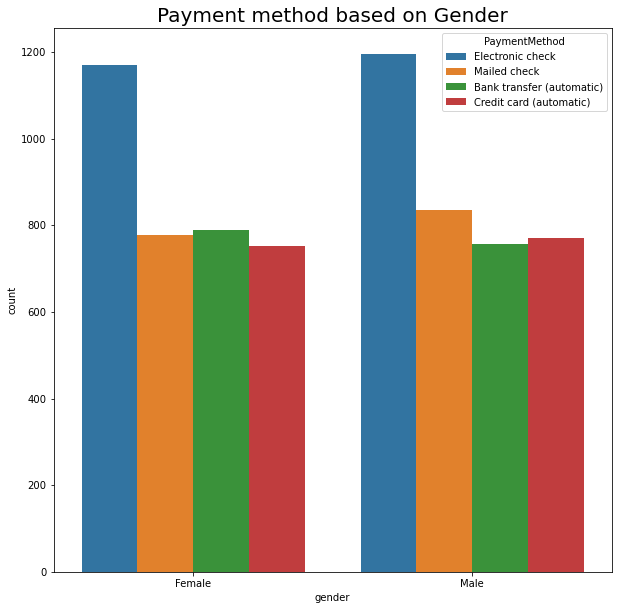

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(x='gender',data=data1,hue="PaymentMethod")
plt.title('Payment method based on Gender',size=20)

# Insights

Both male and female prefer electronic check most.
More females pay via bank transfer than males.
Credit card payments is slight higher in case of males.